# TensorFlow Tutorial Lesson 1

I will be teaching myself the essentials of deep learning by using the `tensorflow` library in Python. Deep learning has always interested me and I always wanted to know how neural networks are able to learn and how their arcitecture affects a models performance. I will also be using the following libraries along with `tensorflow`.

 - `pandas`
 - `numpy`
 - `sklearn`
 - `matplotlib`


 ## Insurance Data Set
I will be using the `insurance.csv` file that I obtained while doing one of CodeCademy's certificate programs for creating deep learning models with `tensorflow`. It is a regression data set and I will be predicting if the cost of someone's health insurance is either going up or down based on the person's data. 

 ### Let the fun Begin :)

In [57]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [58]:
# Importing the data 

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,0rthwest,21984.47061
4,32,0,28.880,0,0,0rthwest,3866.85520


In [59]:
# Cheching for missing values
null_vals = df.isnull().sum()
print(null_vals)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [60]:
# Chehcing the Shape of the data
df.shape

(1338, 7)

In [61]:
# Checking the data types
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [62]:
# Converting the categorical variables to numerical using LabelEncoder
encoder = LabelEncoder()
categorical_data = df.select_dtypes(include=['object']).columns
for col in categorical_data:
    df[col] = encoder.fit_transform(df[col])
# Checking the data types after conversion
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int32
charges     float64
dtype: object

In [63]:
# Scaling the data using StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# Checking the scaled data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,-0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,-0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,-0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802


In [64]:
# Spliting the data into features and labels
X = df.drop('charges', axis=1)
y = df['charges']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Checking the shape of the training and testing sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1070, 6) (1070,)
(268, 6) (268,)


In [65]:
# Setting the random seed for reproducibility
tf.random.set_seed(42)

# Making the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

c:\Users\neche\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
# Fitting the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7041 - mae: 0.5951 - val_loss: 0.5517 - val_mae: 0.5305
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3691 - mae: 0.4419 - val_loss: 0.3467 - val_mae: 0.4202
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2603 - mae: 0.3563 - val_loss: 0.2384 - val_mae: 0.3482
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1913 - mae: 0.2926 - val_loss: 0.1806 - val_mae: 0.2935
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1591 - mae: 0.2557 - val_loss: 0.1550 - val_mae: 0.2578
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1479 - mae: 0.2394 - val_loss: 0.1469 - val_mae: 0.2380
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1435 - mae: 0.2314 - val_loss: 0.1443 - val_mae: 0.2297
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1403 - mae: 0.2276 - val_loss: 0.1435 - val_mae: 0.2272
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1377 - mae:

In [67]:
# Evaluating th model
loss, mae = model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1310 - mae: 0.2114 


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Absolute Error: 0.22
Mean Squared Error: 0.14
R2 Score: 0.86


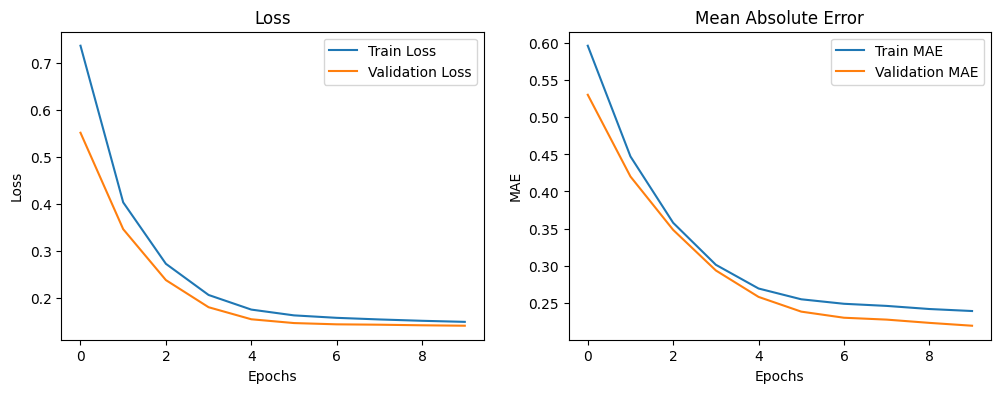

In [68]:
# Using Sklearn to evaluate the model
y_pred = model.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
# Plotting the loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()